In [29]:
import nltk.stem
import string
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, PorterStemmer
import numpy as np

In [158]:
mainDf = pd.read_csv("mainJustice.csv")
mainDf = mainDf.drop(['Unnamed: 0'], axis=1)
mainDf

,ID,facts,issue_area,first_party_winner
0,50606,"<p>In 1970, Jane Roe (a fictional name used in...",3,1
1,50613,<p>Joan Stanley had three children with Peter ...,0,1
2,50623,<p>John Giglio was convicted of passing forged...,1,1
3,50632,"<p>The Idaho Probate Code specified that """"""""m...",0,1
4,50643,"<p>Miller, after conducting a mass mailing cam...",2,1
...,...,...,...,...
3283,63323,<p>Tarahrick Terry pleaded guilty to one count...,3,0
3284,63324,"<p>Refugio Palomar-Santiago, a Mexican nationa...",3,1
3285,63331,<p>Joshua James Cooley was parked in his picku...,0,1
3286,63332,<p>This is an ongoing case of original jurisdi...,3,0


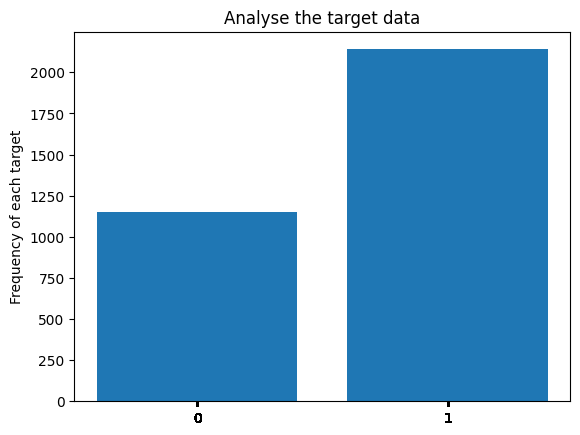

In [159]:
freqTarget = mainDf.groupby(["first_party_winner"], as_index=False, sort=True)["facts"].count()
plt.bar(freqTarget["first_party_winner"], freqTarget["facts"])
plt.xticks(mainDf["first_party_winner"])
plt.title("Analyse the target data")
plt.ylabel('Frequency of each target')
plt.show()

In [160]:
documents = []
X = mainDf["facts"]
pattern = r'[' + string.punctuation + ']'

for i in range(0, len(X)):
  document = sample_str = re.sub(pattern, " ", str(X[i]))
  document = re.sub(r"\W", " ", document)
  document = re.sub(r"\d+", " ", document)
  document = re.sub(r'\b\w{1,1}\b', " ", document)
  document = re.sub(" \d+", " ", document)
  document = re.sub(r"\s+", " ", document, flags=re.I)
  document = document.lower()
  documents.append(document)

In [161]:
tokenDocuments = []
for i in range(0, len(X)):
    tokenDocuments.append(word_tokenize(documents[i]))

In [33]:
stop_words = stopwords.words("english")

In [162]:
cleanTokenDocuments = []

for i in range(0, len(X)):
    cleanTokenDocument = []
    for word in tokenDocuments[i]:
        if word not in stop_words:
            cleanTokenDocument.append(word)
    cleanTokenDocuments.append(cleanTokenDocument)

In [163]:
mainDf["facts"] = cleanTokenDocuments

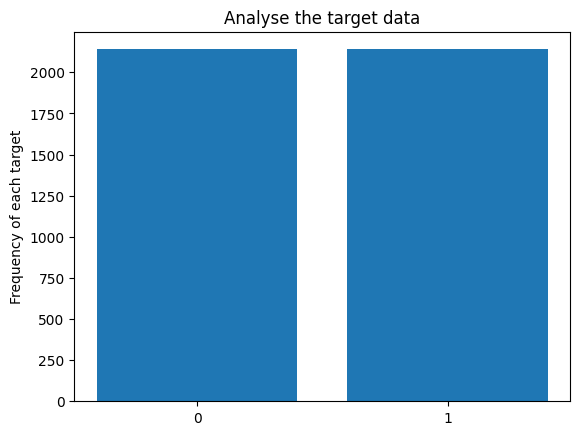

In [164]:
max_size = mainDf["first_party_winner"].value_counts().max() 
lst = [mainDf]
for class_index, group in mainDf.groupby('first_party_winner'):
    lst.append(group.sample(max_size-len(group), replace=True))
balancedMainDf = pd.concat(lst)
balancedMainDf.index = range(len(balancedMainDf))

freqTargetBalanced = balancedMainDf.groupby(["first_party_winner"], as_index=False, sort=True)["facts"].count()

plt.bar(freqTargetBalanced["first_party_winner"], freqTargetBalanced["facts"])
plt.xticks(freqTargetBalanced["first_party_winner"])
plt.title("Analyse the target data")
plt.ylabel('Frequency of each target')
plt.show()

In [37]:
len(balancedMainDf)

4280

In [165]:
lemma = WordNetLemmatizer()

balancedMainDf["lemma"] = balancedMainDf["facts"].apply(lambda x: [lemma.lemmatize(y) for y in x])

In [166]:
postagDocuments = []
for sen in balancedMainDf["lemma"]:
    postagDocuments.append(pos_tag(sen))

balancedMainDf["lemmaPos"] = postagDocuments

In [167]:
balancedMainDf

,ID,facts,issue_area,first_party_winner,lemma,lemmaPos
0,50606,"[jane, roe, fictional, name, used, court, docu...",3,1,"[jane, roe, fictional, name, used, court, docu...","[(jane, NN), (roe, VBZ), (fictional, JJ), (nam..."
1,50613,"[joan, stanley, three, children, peter, stanle...",0,1,"[joan, stanley, three, child, peter, stanley, ...","[(joan, NN), (stanley, VBD), (three, CD), (chi..."
2,50623,"[john, giglio, convicted, passing, forged, mon...",1,1,"[john, giglio, convicted, passing, forged, mon...","[(john, NN), (giglio, NN), (convicted, VBD), (..."
3,50632,"[idaho, probate, code, specified, males, must,...",0,1,"[idaho, probate, code, specified, male, must, ...","[(idaho, JJ), (probate, NN), (code, NN), (spec..."
4,50643,"[miller, conducting, mass, mailing, campaign, ...",2,1,"[miller, conducting, mass, mailing, campaign, ...","[(miller, NN), (conducting, VBG), (mass, NN), ..."
...,...,...,...,...,...,...
4275,53448,"[april, federal, law, enforcement, agents, tai...",3,0,"[april, federal, law, enforcement, agent, tail...","[(april, RB), (federal, JJ), (law, NN), (enfor..."
4276,54799,"[pro, se, petitioner, donald, brancato, sought...",0,0,"[pro, se, petitioner, donald, brancato, sought...","[(pro, FW), (se, FW), (petitioner, NN), (donal..."
4277,55862,"[thomas, gallagher, along, respondents, owners...",3,0,"[thomas, gallagher, along, respondent, owner, ...","[(thomas, NN), (gallagher, NN), (along, IN), (..."
4278,50790,"[robert, sindermann, professor, odessa, junior...",1,0,"[robert, sindermann, professor, odessa, junior...","[(robert, NN), (sindermann, NN), (professor, N..."


In [168]:
words_set = set()
 
for doc in balancedMainDf["facts"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))

Number of words in the corpus: 18889


In [169]:
lemmaWithSomePostagDocuments = []
for sen in balancedMainDf["lemmaPos"]:
    lemmaWithSomePostagDocument = []
    for w in sen:
        if w[1] != "UH" and w[1] != "WP" and w[1] != "WP$" and w[1] != "WRB" and w[1] != "PRP" and w[1] != "PRP$" and w[1] != "MD" and w[1] != "WDT":
            lemmaWithSomePostagDocument.append(w[0])
    lemmaWithSomePostagDocuments.append(lemmaWithSomePostagDocument)
            
balancedMainDf["lemma"] = lemmaWithSomePostagDocuments

In [170]:
words_set = set()
 
for doc in balancedMainDf["lemma"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))

Number of words in the corpus: 16930


In [171]:
balancedMainDf

,ID,facts,issue_area,first_party_winner,lemma,lemmaPos
0,50606,"[jane, roe, fictional, name, used, court, docu...",3,1,"[jane, roe, fictional, name, used, court, docu...","[(jane, NN), (roe, VBZ), (fictional, JJ), (nam..."
1,50613,"[joan, stanley, three, children, peter, stanle...",0,1,"[joan, stanley, three, child, peter, stanley, ...","[(joan, NN), (stanley, VBD), (three, CD), (chi..."
2,50623,"[john, giglio, convicted, passing, forged, mon...",1,1,"[john, giglio, convicted, passing, forged, mon...","[(john, NN), (giglio, NN), (convicted, VBD), (..."
3,50632,"[idaho, probate, code, specified, males, must,...",0,1,"[idaho, probate, code, specified, male, prefer...","[(idaho, JJ), (probate, NN), (code, NN), (spec..."
4,50643,"[miller, conducting, mass, mailing, campaign, ...",2,1,"[miller, conducting, mass, mailing, campaign, ...","[(miller, NN), (conducting, VBG), (mass, NN), ..."
...,...,...,...,...,...,...
4275,53448,"[april, federal, law, enforcement, agents, tai...",3,0,"[april, federal, law, enforcement, agent, tail...","[(april, RB), (federal, JJ), (law, NN), (enfor..."
4276,54799,"[pro, se, petitioner, donald, brancato, sought...",0,0,"[pro, se, petitioner, donald, brancato, sought...","[(pro, FW), (se, FW), (petitioner, NN), (donal..."
4277,55862,"[thomas, gallagher, along, respondents, owners...",3,0,"[thomas, gallagher, along, respondent, owner, ...","[(thomas, NN), (gallagher, NN), (along, IN), (..."
4278,50790,"[robert, sindermann, professor, odessa, junior...",1,0,"[robert, sindermann, professor, odessa, junior...","[(robert, NN), (sindermann, NN), (professor, N..."


In [180]:
words = []
freqOfWords = []

for doc in balancedMainDf["lemma"]:
    for word in doc:
        if word not in words:
            words.append(word)
            freqOfWords.append(1)
        else:
            idx = words.index(word)
            freqOfWords[idx] = freqOfWords[idx] + 1

In [181]:
d = {'words': words, 'frequency': freqOfWords}
freqWordDf = pd.DataFrame(data=d)
freqWordDf = freqWordDf.sort_values(by=['frequency'])

In [182]:
freqWordDf

,words,frequency
4706,mondale,1
3909,montville,1
3908,hometown,1
13155,inititiatives,1
3904,lou,1
...,...,...
399,federal,3158
93,appeal,4591
32,state,5076
14,district,5379


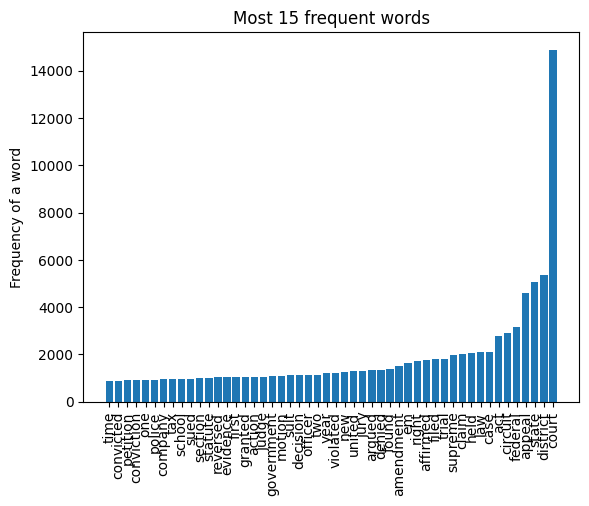

In [183]:
plt.bar(freqWordDf.tail(50)["words"], freqWordDf.tail(50)["frequency"])
plt.xticks(freqWordDf.tail(50)["words"])
plt.title("Most 15 frequent words")
plt.ylabel('Frequency of a word')
plt.xticks(rotation = 90) 
plt.show()

In [174]:
freqWordDf

,words,frequency
0,jane,18
1,roe,12
2,fictional,3
3,name,142
4,used,410
...,...,...
16925,cooley,10
16926,saylor,3
16927,icra,1
16928,orig,2


In [69]:
words = []
targetVar = []
onesList = []
for row in range(0, len(balancedMainDf["lemma"])):
    for word in balancedMainDf["lemma"][row]:
        words.append(word)
        targetVar.append(balancedMainDf["first_party_winner"][row]) 
        onesList.append(1)

In [70]:
d = {'words': words, 'first_party_winner': targetVar, "listOfOnes": onesList}
freqDf = pd.DataFrame(data=d)

In [92]:
countFreqDf = freqDf.groupby(["first_party_winner", "words"], as_index=False, sort=True)["listOfOnes"].count()

In [115]:
countFreqDfZeros = countFreqDf[countFreqDf['first_party_winner'].isin([0])].sort_values(by=['listOfOnes'])

In [118]:
countFreqDfZeros[countFreqDfZeros["listOfOnes"].isin([1])].count()

first_party_winner    1471
words                 1471
listOfOnes            1471
dtype: int64

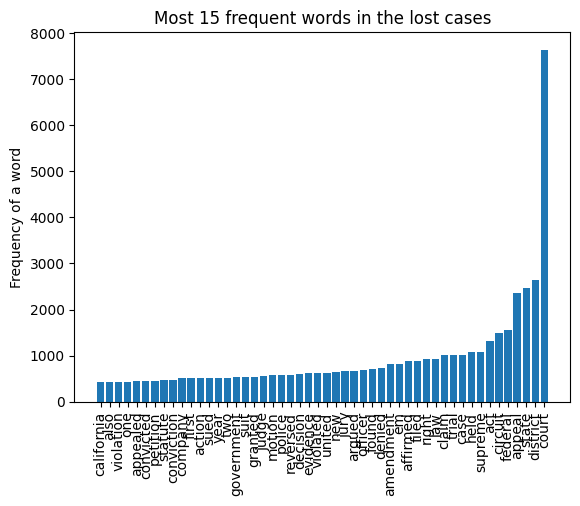

In [140]:
plt.bar(countFreqDfZeros.tail(50)["words"], countFreqDfZeros.tail(50)["listOfOnes"])
plt.xticks(countFreqDfZeros.tail(50)["words"])
plt.title("Most 15 frequent words in the lost cases")
plt.ylabel('Frequency of a word')
plt.xticks(rotation = 90) 
plt.show()

In [130]:
countFreqDfOnes = countFreqDf[countFreqDf['first_party_winner'].isin([1])].sort_values(by=['listOfOnes'])

In [132]:
countFreqDfOnes[countFreqDfOnes["listOfOnes"].isin([1])].count()

first_party_winner    4342
words                 4342
listOfOnes            4342
dtype: int64

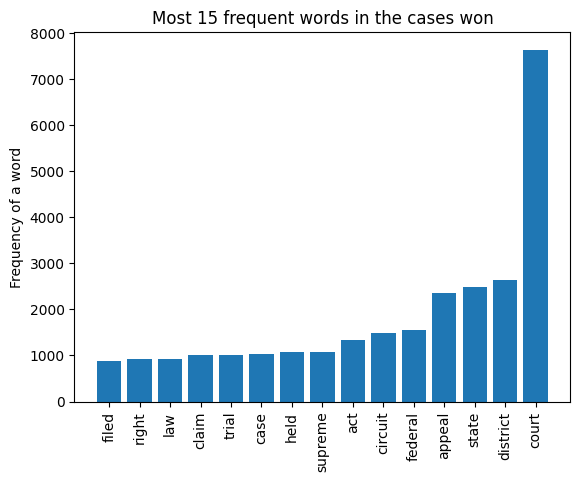

In [141]:
plt.bar(countFreqDfOnes.tail(15)["words"], countFreqDfOnes.tail(15)["listOfOnes"])
plt.xticks(countFreqDfOnes.tail(15)["words"])
plt.title("Most 15 frequent words in the cases won")
plt.ylabel('Frequency of a word')
plt.xticks(rotation = 90) 
plt.show()